### Credit Card Fraud
Data from https://packages.revolutionanalytics.com/datasets/
Creates seperate automated models from 5 types of classsification supervised machine learning models for each of 51 states respectvely

#####technical note- Can use SMOTE for oversampling

In [1]:
#Data Manipulation
import pandas as pd
import os as os
import numpy as np
import statsmodels.formula.api as sm
from sklearn.model_selection import train_test_split

#Data Visualization 
%matplotlib inline
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
#Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostRegressor

#Model Metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


#### Data Ingestion

In [2]:
os.getcwd()

'C:\\Users\\ajaohri'

In [3]:
os.chdir('C:\\Users\\ajaohri\\Desktop\\\ccFraud')

In [4]:
os.listdir()

['ccFraud.csv']

In [5]:
ccf=pd.read_csv('ccFraud.csv')

In [6]:
ccf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000000 entries, 0 to 9999999
Data columns (total 9 columns):
custID          int64
gender          int64
state           int64
cardholder      int64
balance         int64
numTrans        int64
numIntlTrans    int64
creditLine      int64
fraudRisk       int64
dtypes: int64(9)
memory usage: 686.6 MB


In [7]:
ccf.head()

,custID,gender,state,cardholder,balance,numTrans,numIntlTrans,creditLine,fraudRisk
0,1,1,35,1,3000,4,14,2,0
1,2,2,2,1,0,9,0,18,0
2,3,2,2,1,0,27,9,16,0
3,4,1,15,1,0,12,0,5,0
4,5,1,46,1,0,11,16,7,0


In [8]:
ccf.columns

Index(['custID', 'gender', 'state', 'cardholder', 'balance', 'numTrans',
       'numIntlTrans', 'creditLine', 'fraudRisk'],
      dtype='object')

In [9]:
names=list(ccf.columns.values) 


In [10]:
names

['custID',
 'gender',
 'state',
 'cardholder',
 'balance',
 'numTrans',
 'numIntlTrans',
 'creditLine',
 'fraudRisk']

In [11]:
del names[0]

In [12]:
names

['gender',
 'state',
 'cardholder',
 'balance',
 'numTrans',
 'numIntlTrans',
 'creditLine',
 'fraudRisk']

In [13]:
del names[7]

In [14]:
names

['gender',
 'state',
 'cardholder',
 'balance',
 'numTrans',
 'numIntlTrans',
 'creditLine']

In [15]:
type(ccf.state.value_counts())

pandas.core.series.Series

In [16]:
pd.unique(ccf.state)

array([35,  2, 15, 46, 44,  3, 10, 32, 23,  6, 38, 27, 18,  5, 31, 39, 34,
       21, 25, 29,  9, 20, 49, 48, 36, 11, 17, 43, 19,  4,  7, 14, 42, 41,
       16, 26, 22, 30, 28, 13, 12, 47, 24, 33, 51, 50, 45,  1, 37,  8, 40],
      dtype=int64)

In [17]:
ccf.state.value_counts().sort_values(ascending=False)

5     1216069
44     812638
10     608630
35     608575
39     405892
15     404720
36     364531
23     304553
11     303984
29     303833
32     284428
46     252812
43     203827
16     203143
25     203045
48     202972
4      202776
21     202444
20     201918
49     182557
24     182201
6      171774
2      162574
41     152253
19     151715
18     142170
37     122191
38     121846
7      121802
13     111775
26     101829
3      101740
45      91375
34      91326
17      91127
33      81332
50      61385
14      60992
28      60617
12      50438
22      40819
31      40563
9       30333
40      30233
27      30131
51      20691
8       20603
42      20449
30      20215
1       20137
47      20017
Name: state, dtype: int64

In [20]:
d = {}
for x in range(0, 52):
    d[x]=ccf.loc[ccf['state'] == x]

In [26]:
d.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51])

In [33]:
d[0].state.value_counts()

Series([], Name: state, dtype: int64)

In [32]:
d[1].state.value_counts()

1    20137
Name: state, dtype: int64

In [28]:
d[1].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20137 entries, 352 to 9999382
Data columns (total 9 columns):
custID          20137 non-null int64
gender          20137 non-null int64
state           20137 non-null int64
cardholder      20137 non-null int64
balance         20137 non-null int64
numTrans        20137 non-null int64
numIntlTrans    20137 non-null int64
creditLine      20137 non-null int64
fraudRisk       20137 non-null int64
dtypes: int64(9)
memory usage: 1.5 MB


In [31]:
d[2].state.value_counts()

2    162574
Name: state, dtype: int64

In [36]:
d[2].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162574 entries, 1 to 9999948
Data columns (total 9 columns):
custID          162574 non-null int64
gender          162574 non-null int64
state           162574 non-null int64
cardholder      162574 non-null int64
balance         162574 non-null int64
numTrans        162574 non-null int64
numIntlTrans    162574 non-null int64
creditLine      162574 non-null int64
fraudRisk       162574 non-null int64
dtypes: int64(9)
memory usage: 12.4 MB


In [37]:
d[51].state.value_counts()

51    20691
Name: state, dtype: int64

In [38]:
 pd.crosstab(ccf.state,ccf.fraudRisk,margins=True)

fraudRisk,0,1,All
state,,,
1,18478,1659,20137
2,152710,9864,162574
3,96825,4915,101740
4,187807,14969,202776
5,1123067,93002,1216069
6,159853,11921,171774
7,114491,7311,121802
8,19459,1144,20603
9,27908,2425,30333


In [40]:
#on hot encoder however is too slow on 51 extra columns for 10 million rows
pd.get_dummies(ccf.state)

,1,2,3,4,5,6,7,8,9,10,...,42,43,44,45,46,47,48,49,50,51
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
6,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
pd.crosstab(ccf.state,ccf.fraudRisk).apply(lambda r: 100*r/r.sum(), axis=1)

fraudRisk,0,1
state,,
1,91.761434,8.238566
2,93.932609,6.067391
3,95.169058,4.830942
4,92.617963,7.382037
5,92.352243,7.647757
6,93.060067,6.939933
7,93.997636,6.002364
8,94.447411,5.552589
9,92.005407,7.994593


In [42]:
pd.crosstab(ccf.state,ccf.fraudRisk).apply(lambda r: 100*r/r.sum(), axis=1).sort_values(by=1)

fraudRisk,0,1
state,,
38,95.700310,4.299690
13,95.666294,4.333706
47,95.658690,4.341310
23,95.605691,4.394309
43,95.603134,4.396866
35,95.596434,4.403566
32,95.583417,4.416583
19,95.557460,4.442540
24,95.410014,4.589986


In [43]:
df=pd.crosstab(ccf.state,ccf.fraudRisk).apply(lambda r: 100*r/r.sum(), axis=1).sort_values(by=1)
type(df)
df['state']=df.index

In [44]:
df.columns

Index([0, 1, 'state'], dtype='object', name='fraudRisk')

In [45]:
df.head()

fraudRisk,0,1,state
state,,,
38,95.700310,4.299690,38
13,95.666294,4.333706,13
47,95.658690,4.341310,47
23,95.605691,4.394309,23
43,95.603134,4.396866,43


In [46]:
df=df.rename(columns = {'1':'Fraud Percentage'})

In [47]:
df.head()

fraudRisk,0,1,state
state,,,
38,95.700310,4.299690,38
13,95.666294,4.333706,13
47,95.658690,4.341310,47
23,95.605691,4.394309,23
43,95.603134,4.396866,43


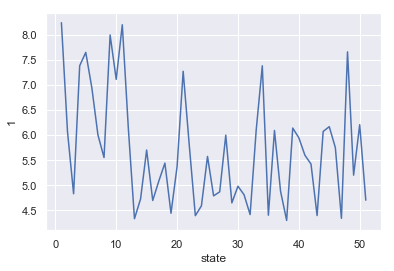

In [48]:
%matplotlib inline
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
ax = sns.lineplot(y=1, x='state', data=df)


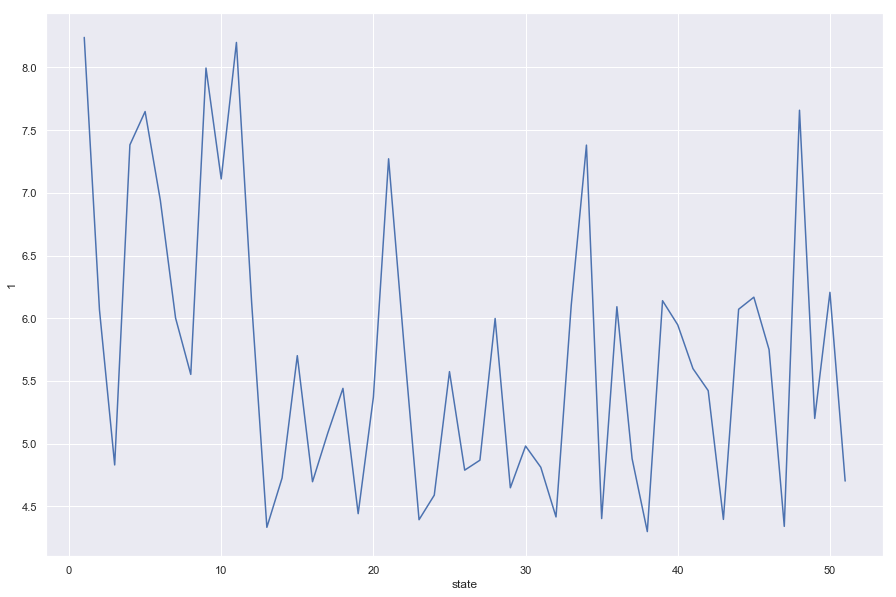

In [49]:
#Increasing Scale of visualization
fig = plt.figure(figsize=(15,10))
fig.add_subplot(1,1,1)
ax = sns.lineplot(y=1, x='state', data=df)


In [50]:
d.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51])

In [54]:
names

['gender',
 'state',
 'cardholder',
 'balance',
 'numTrans',
 'numIntlTrans',
 'creditLine']

In [55]:
del names[1]

In [56]:
names

['gender', 'cardholder', 'balance', 'numTrans', 'numIntlTrans', 'creditLine']

In [62]:
d[1][names].head()

,gender,cardholder,balance,numTrans,numIntlTrans,creditLine
352,2,1,8422,13,0,14
470,2,1,8330,23,0,8
1300,1,2,6000,10,0,5
2222,1,1,4000,8,0,3
2726,2,1,6000,39,0,5


In [98]:
results={}
for x in range(1, 51):
        results[x] = sm.Logit(d[x].fraudRisk, d[x][names]).fit().summary2()

Optimization terminated successfully.
         Current function value: 0.162730
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.122703
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.099826
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.145678
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.151567
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.138632
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.121999
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.112633
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.154776
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.141755
  

In [99]:
results.keys()

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])

In [104]:
d[1].head()

,custID,gender,state,cardholder,balance,numTrans,numIntlTrans,creditLine,fraudRisk
352,353,2,1,1,8422,13,0,14,0
470,471,2,1,1,8330,23,0,8,0
1300,1301,1,1,2,6000,10,0,5,0
2222,2223,1,1,1,4000,8,0,3,0
2726,2727,2,1,1,6000,39,0,5,0


In [100]:
results[1]

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
================================================================
Model:              Logit            Pseudo R-squared: 0.428    
Dependent Variable: fraudRisk        AIC:              6565.7711
Date:               2018-09-24 13:35 BIC:              6613.2329
No. Observations:   20137            Log-Likelihood:   -3276.9  
Df Model:           5                LL-Null:          -5730.1  
Df Residuals:       20131            LLR p-value:      0.0000   
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     8.0000                                      
----------------------------------------------------------------
                 Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------
gender           0.1159   0.0669   1.7306 0.0835 -0.0154  0.2471
cardholder      -7.2519   0.1512 -47.9743 0.0000 -7.5482 -6.9556
balance          0.0003   0.0000  40.3367 0.0000  0.0003  0.0003
numTrans         0.0399   0.0011  35.9858 0.0000  0.0377  0.0421
numIntlTrans     0.0253   0.0033   7.7205 0.0000  0.0189  0.0317
creditLine       0.0789   0.0026  29.8975 0.0000  0.0738  0.0841
================================================================

"""

In [103]:
d[2].head()

,custID,gender,state,cardholder,balance,numTrans,numIntlTrans,creditLine,fraudRisk
1,2,2,2,1,0,9,0,18,0
2,3,2,2,1,0,27,9,16,0
71,72,1,2,1,5000,35,8,4,0
78,79,1,2,1,0,29,7,4,0
89,90,2,2,1,4000,14,20,3,0


In [101]:
results[2]

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.464     
Dependent Variable: fraudRisk        AIC:              39908.6421
Date:               2018-09-24 13:35 BIC:              39968.6354
No. Observations:   162574           Log-Likelihood:   -19948.   
Df Model:           5                LL-Null:          -37200.   
Df Residuals:       162568           LLR p-value:      0.0000    
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     9.0000                                       
-----------------------------------------------------------------
                 Coef.  Std.Err.     z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------
gender           0.1810   0.0275    6.5943 0.0000  0.1272  0.2348
cardholder      -8.0857   0.0647 -124.9359 0.0000 -8.2125 -7.9589
balance          0.0003   0.0000  104.9942 0.0000  0.0003  0.0003
numTrans         0.0407   0.0005   88.8302 0.0000  0.0398  0.0416
numIntlTrans     0.0252   0.0013   19.4259 0.0000  0.0227  0.0278
creditLine       0.0856   0.0010   83.8540 0.0000  0.0836  0.0876
=================================================================

"""

In [118]:
results[2].tables[0][1:3]

,0,1,2,3
1,Dependent Variable:,fraudRisk,AIC:,39908.6421
2,Date:,2018-09-24 13:35,BIC:,39968.6354


In [69]:
b=pd.get_dummies(ccf.state)

In [70]:
b.head()

,1,2,3,4,5,6,7,8,9,10,...,42,43,44,45,46,47,48,49,50,51
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [72]:
ccf_c = pd.concat([ccf.reset_index(drop=True), b], axis=1)


In [73]:
ccf_c.columns

Index([      'custID',       'gender',        'state',   'cardholder',
            'balance',     'numTrans', 'numIntlTrans',   'creditLine',
          'fraudRisk',              1,              2,              3,
                    4,              5,              6,              7,
                    8,              9,             10,             11,
                   12,             13,             14,             15,
                   16,             17,             18,             19,
                   20,             21,             22,             23,
                   24,             25,             26,             27,
                   28,             29,             30,             31,
                   32,             33,             34,             35,
                   36,             37,             38,             39,
                   40,             41,             42,             43,
                   44,             45,             46,             47,
      

In [74]:
ccf_c.head()

,custID,gender,state,cardholder,balance,numTrans,numIntlTrans,creditLine,fraudRisk,1,...,42,43,44,45,46,47,48,49,50,51
0,1,1,35,1,3000,4,14,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,2,2,1,0,9,0,18,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,2,2,1,0,27,9,16,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,1,15,1,0,12,0,5,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,1,46,1,0,11,16,7,0,0,...,0,0,0,0,1,0,0,0,0,0


In [76]:
del ccf_c['state']

In [77]:
ccf_c.head()

,custID,gender,cardholder,balance,numTrans,numIntlTrans,creditLine,fraudRisk,1,2,...,42,43,44,45,46,47,48,49,50,51
0,1,1,1,3000,4,14,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,2,1,0,9,0,18,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,3,2,1,0,27,9,16,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,4,1,1,0,12,0,5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,1,1,0,11,16,7,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [80]:
names

['gender',
 'state',
 'cardholder',
 'balance',
 'numTrans',
 'numIntlTrans',
 'creditLine']

In [81]:
del names[1]

In [83]:
ccf_c.columns

Index([      'custID',       'gender',   'cardholder',      'balance',
           'numTrans', 'numIntlTrans',   'creditLine',    'fraudRisk',
                    1,              2,              3,              4,
                    5,              6,              7,              8,
                    9,             10,             11,             12,
                   13,             14,             15,             16,
                   17,             18,             19,             20,
                   21,             22,             23,             24,
                   25,             26,             27,             28,
                   29,             30,             31,             32,
                   33,             34,             35,             36,
                   37,             38,             39,             40,
                   41,             42,             43,             44,
                   45,             46,             47,             48,
      

In [87]:
newnames=ccf_c.columns

In [90]:
newnames=list(newnames)

In [92]:
del newnames[0]

In [93]:
newnames

['gender',
 'cardholder',
 'balance',
 'numTrans',
 'numIntlTrans',
 'creditLine',
 'fraudRisk',
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51]

- Due to size of data and the sparse matrix of 1000000 X 51 this approach is not recommended computationally
- result1 = sm.Logit(ccf_c['fraudRisk'], ccf_c[newnames])
- result1 = result1.fit()

In [94]:
del newnames[6]

In [119]:
names

['gender', 'cardholder', 'balance', 'numTrans', 'numIntlTrans', 'creditLine']

In [95]:
np.random.seed(0)


In [121]:
d[1].head()

,custID,gender,state,cardholder,balance,numTrans,numIntlTrans,creditLine,fraudRisk
352,353,2,1,1,8422,13,0,14,0
470,471,2,1,1,8330,23,0,8,0
1300,1301,1,1,2,6000,10,0,5,0
2222,2223,1,1,1,4000,8,0,3,0
2726,2727,2,1,1,6000,39,0,5,0


In [122]:
d[51].head()

,custID,gender,state,cardholder,balance,numTrans,numIntlTrans,creditLine,fraudRisk
281,282,2,51,1,5220,49,0,7,0
1412,1413,2,51,1,0,9,0,7,0
2386,2387,1,51,1,0,69,0,7,0
2424,2425,1,51,1,0,33,17,14,0
2516,2517,2,51,1,974,70,0,4,0


In [123]:
d[0].head()

,custID,gender,state,cardholder,balance,numTrans,numIntlTrans,creditLine,fraudRisk


In [141]:
from sklearn.metrics import roc_auc_score


In [142]:
lr={}
gnb={}
svc={}
rfc={}
classifier={}
regr_1={}
regr_2={}
import datetime 
datetime.datetime.now() 

for x in range(1, 52):
    X_train, X_test, y_train, y_test = train_test_split(d[x][names], d[x].fraudRisk, test_size=0.3)
    print(len(X_train))
    print(len(y_test))
    # Create classifiers
    lr[x] = LogisticRegression().fit(X_train, y_train).predict(X_test)
    gnb[x] = GaussianNB().fit(X_train, y_train).predict(X_test)
    svc[x] = LinearSVC(C=1.0).fit(X_train, y_train).predict(X_test)
    rfc[x] = RandomForestClassifier(n_estimators=1).fit(X_train, y_train).predict(X_test)
    classifier[x] = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train).predict(X_test)  
    #regr_1[x] = DecisionTreeRegressor(max_depth=2).fit(X_train, y_train).predict(X_test)
    #regr_2[x] = AdaBoostRegressor(DecisionTreeRegressor(max_depth=2),n_estimators=3, random_state=np.random.RandomState(0)).fit(X_train, y_train).predict(X_test)
    print(datetime.datetime.now())
    print("Accuracy Score for model for  state ",x, 'is  ')
    print('LogisticRegression',accuracy_score(y_test,lr[x]))
    print('GaussianNB',accuracy_score(y_test,gnb[x]))
    print('LinearSVC',accuracy_score(y_test,svc[x]))
    #print(accuracy_score(y_test,regr_1[x]))
    print('RandomForestClassifier',accuracy_score(y_test,rfc[x]))
    print('KNeighborsClassifier',accuracy_score(y_test,classifier[x]))
   # print(accuracy_score(y_test,regr_2[x]))
    print("Classification Report for model for state ",x, 'is  ')
    print('LogisticRegression',classification_report(y_test,lr[x]))
    print('GaussianNB',classification_report(y_test,gnb[x]))
    print('LinearSVC',classification_report(y_test,svc[x]))
   # print(classification_report(y_test,regr_1[x]))
    print('RandomForestClassifier',classification_report(y_test,rfc[x]))
    print('KNeighborsClassifier',classification_report(y_test,classifier[x]))
   # print(classification_report(y_test,regr_2[x]))
    print("Confusion Matrix Report for model for state ",x, 'is  ')          
    print('LogisticRegression',confusion_matrix(y_test,lr[x]))
    print('GaussianNB',confusion_matrix(y_test,gnb[x]))
    print('LinearSVC',confusion_matrix(y_test,svc[x]))
   # print(confusion_matrix(y_test,regr_1[x]))
    print('RandomForestClassifier',confusion_matrix(y_test,rfc[x]))
    print('KNeighborsClassifier',confusion_matrix(y_test,classifier[x]))
    #print(confusion_matrix(y_test,regr_2[x]))
    print("Area Under Curve for model for state ",x, 'is  ')          
    print('LogisticRegression',roc_auc_score(y_test,lr[x]))
    print('GaussianNB',roc_auc_score(y_test,gnb[x]))
    print('LinearSVC',roc_auc_score(y_test,svc[x]))
   # print(roc_auc_score(y_test,regr_1[x]))
    print('RandomForestClassifier',roc_auc_score(y_test,rfc[x]))
    print('KNeighborsClassifier',roc_auc_score(y_test,classifier[x]))
   # print(roc_auc_score(y_test,regr_2[x]))


14095
6042
2018-09-24 15:14:47.500450
Accuracy Score for model for  state  1 is  
LogisticRegression 0.944554783184376
GaussianNB 0.9193975504799735
LinearSVC 0.9235352532274081
RandomForestClassifier 0.9213836477987422
KNeighborsClassifier 0.9306521019529957
Classification Report for model for state  1 is  
LogisticRegression              precision    recall  f1-score   support

          0       0.96      0.98      0.97      5558
          1       0.73      0.49      0.58       484

avg / total       0.94      0.94      0.94      6042

GaussianNB              precision    recall  f1-score   support

          0       0.96      0.95      0.96      5558
          1       0.50      0.53      0.51       484

avg / total       0.92      0.92      0.92      6042

LinearSVC              precision    recall  f1-score   support

          0       0.92      1.00      0.96      5558
          1       1.00      0.05      0.09       484

avg / total       0.93      0.92      0.89      6042

Rando

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


141943
60833
2018-09-24 15:16:00.913203
Accuracy Score for model for  state  4 is  
LogisticRegression 0.9502408232373876
GaussianNB 0.9297749576710009
LinearSVC 0.9453092893659691
RandomForestClassifier 0.928180428385909
KNeighborsClassifier 0.9393256949353147
Classification Report for model for state  4 is  
LogisticRegression              precision    recall  f1-score   support

          0       0.96      0.99      0.97     56204
          1       0.77      0.50      0.60      4629

avg / total       0.95      0.95      0.95     60833

GaussianNB              precision    recall  f1-score   support

          0       0.96      0.96      0.96     56204
          1       0.54      0.56      0.55      4629

avg / total       0.93      0.93      0.93     60833

LinearSVC              precision    recall  f1-score   support

          0       0.96      0.98      0.97     56204
          1       0.69      0.50      0.58      4629

avg / total       0.94      0.95      0.94     60833

Ran

2018-09-24 15:25:59.111215
Accuracy Score for model for  state  9 is  
LogisticRegression 0.9421978021978022
GaussianNB 0.9284615384615384
LinearSVC 0.8823076923076923
RandomForestClassifier 0.9174725274725275
KNeighborsClassifier 0.9316483516483517
Classification Report for model for state  9 is  
LogisticRegression              precision    recall  f1-score   support

          0       0.96      0.98      0.97      8365
          1       0.71      0.47      0.57       735

avg / total       0.94      0.94      0.94      9100

GaussianNB              precision    recall  f1-score   support

          0       0.96      0.96      0.96      8365
          1       0.56      0.54      0.55       735

avg / total       0.93      0.93      0.93      9100

LinearSVC              precision    recall  f1-score   support

          0       0.98      0.89      0.93      8365
          1       0.38      0.74      0.50       735

avg / total       0.93      0.88      0.90      9100

RandomForestCla

42694
18298
2018-09-24 15:30:30.582639
Accuracy Score for model for  state  14 is  
LogisticRegression 0.9669362771887638
GaussianNB 0.94769920209859
LinearSVC 0.9518526614930594
RandomForestClassifier 0.9508142966444421
KNeighborsClassifier 0.9581921521477758
Classification Report for model for state  14 is  
LogisticRegression              precision    recall  f1-score   support

          0       0.97      0.99      0.98     17411
          1       0.75      0.48      0.59       887

avg / total       0.96      0.97      0.96     18298

GaussianNB              precision    recall  f1-score   support

          0       0.98      0.97      0.97     17411
          1       0.47      0.59      0.52       887

avg / total       0.95      0.95      0.95     18298

LinearSVC              precision    recall  f1-score   support

          0       0.95      1.00      0.98     17411
          1       1.00      0.01      0.01       887

avg / total       0.95      0.95      0.93     18298

Ran

KNeighborsClassifier [[39709   623]
 [ 1406   913]]
Area Under Curve for model for state  18 is  
LogisticRegression 0.721047533800632
GaussianNB 0.7647931771728034
LinearSVC 0.5019280944871667
RandomForestClassifier 0.7205950795974266
KNeighborsClassifier 0.6891286956039772
106200
45515
2018-09-24 15:33:30.313362
Accuracy Score for model for  state  19 is  
LogisticRegression 0.9685158738877293
GaussianNB 0.947819400197737
LinearSVC 0.9562561792815555
RandomForestClassifier 0.9541469845106009
KNeighborsClassifier 0.9611556629682523
Classification Report for model for state  19 is  
LogisticRegression              precision    recall  f1-score   support

          0       0.98      0.99      0.98     43520
          1       0.72      0.46      0.56      1995

avg / total       0.96      0.97      0.97     45515

GaussianNB              precision    recall  f1-score   support

          0       0.98      0.96      0.97     43520
          1       0.43      0.58      0.50      1995

avg 

2018-09-24 15:35:49.933651
Accuracy Score for model for  state  23 is  
LogisticRegression 0.9683470875380339
GaussianNB 0.9470043561062101
LinearSVC 0.955585228640851
RandomForestClassifier 0.9553772738217717
KNeighborsClassifier 0.9624367926799904
Classification Report for model for state  23 is  
LogisticRegression              precision    recall  f1-score   support

          0       0.97      0.99      0.98     87307
          1       0.74      0.44      0.55      4059

avg / total       0.96      0.97      0.96     91366

GaussianNB              precision    recall  f1-score   support

          0       0.98      0.96      0.97     87307
          1       0.43      0.58      0.49      4059

avg / total       0.96      0.95      0.95     91366

LinearSVC              precision    recall  f1-score   support

          0       0.96      1.00      0.98     87307
          1       1.00      0.00      0.00      4059

avg / total       0.96      0.96      0.93     91366

RandomForestCl

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


2018-09-24 15:37:10.034786
Accuracy Score for model for  state  28 is  
LogisticRegression 0.9586495106125591
GaussianNB 0.9392939623886506
LinearSVC 0.9430331023864511
RandomForestClassifier 0.9383591773892005
KNeighborsClassifier 0.9491916859122402
Classification Report for model for state  28 is  
LogisticRegression              precision    recall  f1-score   support

          0       0.97      0.99      0.98     17127
          1       0.73      0.46      0.56      1059

avg / total       0.95      0.96      0.95     18186

GaussianNB              precision    recall  f1-score   support

          0       0.97      0.96      0.97     17127
          1       0.48      0.56      0.52      1059

avg / total       0.94      0.94      0.94     18186

LinearSVC              precision    recall  f1-score   support

          0       0.94      1.00      0.97     17127
          1       1.00      0.02      0.04      1059

avg / total       0.95      0.94      0.92     18186

RandomForestC

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


2018-09-24 15:39:07.703264
Accuracy Score for model for  state  32 is  
LogisticRegression 0.9690726482204175
GaussianNB 0.9482825299722252
LinearSVC 0.9562399653107384
RandomForestClassifier 0.9559352623375406
KNeighborsClassifier 0.9625918503674015
Classification Report for model for state  32 is  
LogisticRegression              precision    recall  f1-score   support

          0       0.98      0.99      0.98     81570
          1       0.74      0.45      0.56      3759

avg / total       0.97      0.97      0.97     85329

GaussianNB              precision    recall  f1-score   support

          0       0.98      0.96      0.97     81570
          1       0.44      0.59      0.50      3759

avg / total       0.96      0.95      0.95     85329

LinearSVC              precision    recall  f1-score   support

          0       0.96      1.00      0.98     81570
          1       1.00      0.01      0.01      3759

avg / total       0.96      0.96      0.94     85329

RandomForestC

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


63928
27398
2018-09-24 15:39:29.429738
Accuracy Score for model for  state  34 is  
LogisticRegression 0.951237316592452
GaussianNB 0.9277319512373166
LinearSVC 0.9453974742681948
RandomForestClassifier 0.9259799985400394
KNeighborsClassifier 0.9383166654500329
Classification Report for model for state  34 is  
LogisticRegression              precision    recall  f1-score   support

          0       0.96      0.99      0.97     25351
          1       0.76      0.50      0.61      2047

avg / total       0.95      0.95      0.95     27398

GaussianNB              precision    recall  f1-score   support

          0       0.96      0.96      0.96     25351
          1       0.52      0.56      0.54      2047

avg / total       0.93      0.93      0.93     27398

LinearSVC              precision    recall  f1-score   support

          0       0.96      0.99      0.97     25351
          1       0.71      0.45      0.55      2047

avg / total       0.94      0.95      0.94     27398

Ra

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


LogisticRegression [[101781   1048]
 [  3398   3133]]
GaussianNB [[98863  3966]
 [ 2817  3714]]
LinearSVC [[102829      0]
 [  6531      0]]
RandomForestClassifier [[99830  2999]
 [ 3361  3170]]
KNeighborsClassifier [[100994   1835]
 [  3609   2922]]
Area Under Curve for model for state  36 is  
LogisticRegression 0.7347602323232422
GaussianNB 0.7650517994310277
LinearSVC 0.5
RandomForestClassifier 0.7281062532116329
KNeighborsClassifier 0.7147797624674307
85533
36658
2018-09-24 15:44:00.423913
Accuracy Score for model for  state  37 is  
LogisticRegression 0.9657646352774292
GaussianNB 0.9441049702656992
LinearSVC 0.9143706694309565
RandomForestClassifier 0.9493425718806263
KNeighborsClassifier 0.9582083037808936
Classification Report for model for state  37 is  
LogisticRegression              precision    recall  f1-score   support

          0       0.97      0.99      0.98     34886
          1       0.75      0.44      0.56      1772

avg / total       0.96      0.97      0.96   

2018-09-24 15:46:20.209923
Accuracy Score for model for  state  41 is  
LogisticRegression 0.9612487958665382
GaussianNB 0.9393335668622471
LinearSVC 0.9479595411156844
RandomForestClassifier 0.9448069007794028
KNeighborsClassifier 0.9532358350118224
Classification Report for model for state  41 is  
LogisticRegression              precision    recall  f1-score   support

          0       0.97      0.99      0.98     43116
          1       0.74      0.47      0.58      2560

avg / total       0.96      0.96      0.96     45676

GaussianNB              precision    recall  f1-score   support

          0       0.97      0.96      0.97     43116
          1       0.47      0.58      0.52      2560

avg / total       0.95      0.94      0.94     45676

LinearSVC              precision    recall  f1-score   support

          0       0.95      0.99      0.97     43116
          1       0.60      0.21      0.31      2560

avg / total       0.94      0.95      0.94     45676

RandomForestC

176968
75844
2018-09-24 15:52:21.143015
Accuracy Score for model for  state  46 is  
LogisticRegression 0.9590870734665893
GaussianNB 0.9373714466536575
LinearSVC 0.9503454459152998
RandomForestClassifier 0.9418938874531934
KNeighborsClassifier 0.9508596593006698
Classification Report for model for state  46 is  
LogisticRegression              precision    recall  f1-score   support

          0       0.97      0.99      0.98     71475
          1       0.73      0.46      0.57      4369

avg / total       0.95      0.96      0.95     75844

GaussianNB              precision    recall  f1-score   support

          0       0.97      0.96      0.97     71475
          1       0.46      0.54      0.50      4369

avg / total       0.94      0.94      0.94     75844

LinearSVC              precision    recall  f1-score   support

          0       0.95      1.00      0.97     71475
          1       0.94      0.15      0.26      4369

avg / total       0.95      0.95      0.93     75844



import datetime
datetime.datetime.now()
print(datetime.datetime.now())
classifier.fit(X_train, y_train)

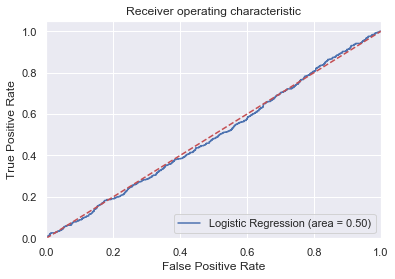

In [186]:
#Plot AUC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, LogisticRegression().fit(X_train, y_train).predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, LogisticRegression().fit(X_train, y_train).predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('ROC Curve for Classification of Fraud')
plt.show()

In [163]:
d.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51])

In [ ]:
#Plot AUC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

    lr[x] = LogisticRegression().fit(X_train, y_train).predict(X_test)
    gnb[x] = GaussianNB().fit(X_train, y_train).predict(X_test)
    svc[x] = LinearSVC(C=1.0).fit(X_train, y_train).predict(X_test)
    rfc[x] = RandomForestClassifier(n_estimators=1).fit(X_train, y_train).predict(X_test)
    classifier[x] = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train).predict(X_test)

In [171]:
d[1].head()

,custID,gender,state,cardholder,balance,numTrans,numIntlTrans,creditLine,fraudRisk
352,353,2,1,1,8422,13,0,14,0
470,471,2,1,1,8330,23,0,8,0
1300,1301,1,1,2,6000,10,0,5,0
2222,2223,1,1,1,4000,8,0,3,0
2726,2727,2,1,1,6000,39,0,5,0


In [178]:
plt.figure()

# Add the models to the list that you want to view on the ROC plot
models = [
{
    'label': 'Logistic Regression',
    'model': LogisticRegression(),
},
{
    'label': 'GaussianNB',
    'model': GaussianNB(),
},

{
    'label': 'RandomForestClassifier',
    'model': RandomForestClassifier(),
},
{
    'label': 'KNeighborsClassifier',
    'model': KNeighborsClassifier(),
}
]

<Figure size 432x288 with 0 Axes>

In [176]:
import sklearn

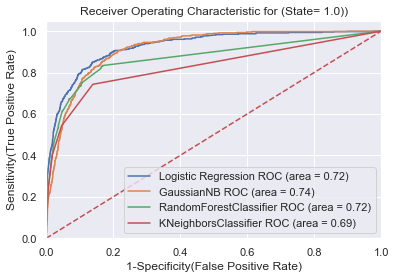

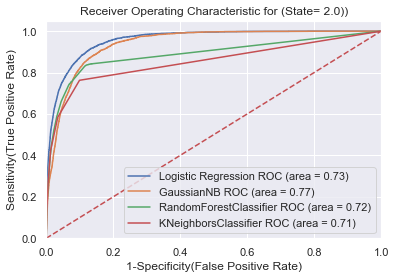

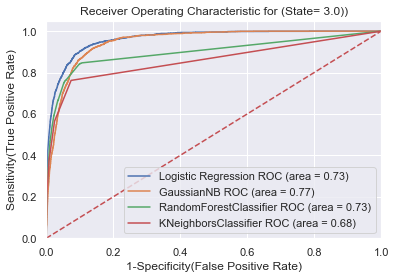

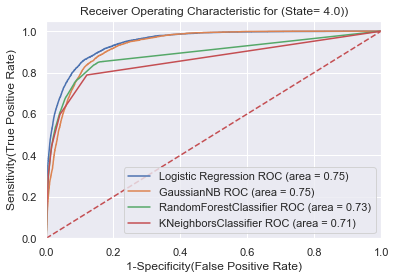

In [190]:
# Below for loop iterates through your models list

for x in range(1, 5):
    x_train, x_test, y_train, y_test = train_test_split(d[x][names], d[x].fraudRisk, test_size=0.3)
    for m in models:
        model = m['model'] # select the model
        model.fit(x_train, y_train) # train the model
        y_pred=model.predict(x_test) # predict the test data
        # Compute False postive rate, and True positive rate
        fpr, tpr, thresholds = sklearn.metrics.roc_curve(y_test, model.predict_proba(x_test)[:,1])
        # Calculate Area under the curve to display on the plot
        auc = sklearn.metrics.roc_auc_score(y_test,model.predict(x_test))
        # Now, plot the computed values
        plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))
    # Custom settings for the plot 
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('1-Specificity(False Positive Rate)')
    plt.ylabel('Sensitivity(True Positive Rate)')
    plt.title('Receiver Operating Characteristic for (State= %0.1f))'%x)
    plt.legend(loc="lower right")
    plt.show()   # Display

#### Possible To dos- Add more algorithms like xgboost
#### Create a template for model metric presentation